In [85]:
import pandas as pd
import statsmodels.api as sm

# 데이터 로드
data = pd.read_csv('./remove_outlier_dataset.csv', encoding='utf-8', index_col=0)
data["registration_time"] = pd.to_datetime(data["registration_time"])
data.dropna(axis=0, subset="cast_pressure", inplace=True)

# 독립변수와 종속변수 설정
X = data[["cast_pressure", "biscuit_thickness", "sleeve_temperature", "count",'upper_mold_temp2','lower_mold_temp2'
       ]]  # 독립변수 리스트
y = data['passorfail']  # 종속변수

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
model = sm.Logit(y, X).fit()

# 결과 출력
print(model.summary())

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_108636\339451885.py:5: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./remove_outlier_dataset.csv', encoding='utf-8', index_col=0)


Optimization terminated successfully.
         Current function value: 0.076946
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             passorfail   No. Observations:                91493
Model:                          Logit   Df Residuals:                    91486
Method:                           MLE   Df Model:                            6
Date:                Sun, 03 Nov 2024   Pseudo R-squ.:                  0.5603
Time:                        09:52:03   Log-Likelihood:                -7040.0
converged:                       True   LL-Null:                       -16012.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 30.2527      1.530     19.779      0.000      27.255      33.250
cast

In [86]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 예측 확률 계산
y_pred_prob = model.predict(X)

# ROC 곡선
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

# 혼동 행렬
y_pred = (y_pred_prob > 0.5).astype(int)  # 0.5를 기준으로 이진 분류
conf_matrix = confusion_matrix(y, y_pred)

print(f'AUC: {roc_auc}')
print(f'Confusion Matrix:\n{conf_matrix}')

AUC: 0.9020024168968775
Confusion Matrix:
[[87605    23]
 [ 1574  2291]]


Text(50.722222222222214, 0.5, 'True Label')

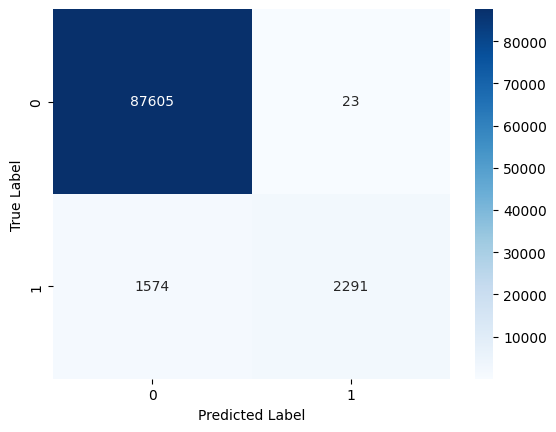

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
# 혼동 행렬 시각화
# 시각화
sns.heatmap(conf_matrix, annot=True ,fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')